# Direct S3 Access tutorial

This tutorial will show you how to authenticate with the PO.DAAC data archive, and gain access to the data in amazon S3 buckets. This allows you to natively list, copy, get data from the PO.DAAC archive using your preferred amazon methods (e.g. Python boto3, amazon SDK, aws cli).

**note** Direct S3 access is only available to users **running in AWS, us-west-2 region.** All other access must come from HTTP requests for PO.DAAC data

In [1]:
import boto3
import json
import xarray as xr
%matplotlib inline


## Authenticate with EDL and retrieve temporary S3 credentials:

You need a temporary S3 credential to access data in the cloud from within the AWS us-west-2 region. To do this, we use our earthdata login when calling a special API endpoint to receive this temporary token.

Visit https://archive.podaac.earthdata.nasa.gov/s3credentials to get your access_key, secrect_access_key, and token. Paste the response into the s3_credential area below.

In [2]:
# Paste the result of your accessing and login to the s3Credential endpoint above into the 's3_credential' variable here:
s3_credential = '{"accessKeyId": "***", "secretAccessKey": "***", "sessionToken": "***", "expiration": "2021-10-01 06:11:26+00:00"}'
creds = json.loads(s3_credential)

In [3]:
s3_client = boto3.client(
    's3',
    aws_access_key_id=creds["accessKeyId"],
    aws_secret_access_key=creds["secretAccessKey"],
    aws_session_token=creds["sessionToken"]
)

In [4]:
s3_client.list_objects(Bucket="podaac-ops-cumulus-protected", Prefix="ECCO_L4_ATM_STATE_05DEG_DAILY_V4R4/")

{'ResponseMetadata': {'RequestId': 'RCVH1RWVC1T2859F',
  'HostId': 'e71keXSZx/goqgoLX4yTtkEn6+G3vskGrna89apYu4/rVuXO5NoBMUE+Tp4l32I4MF0+Iban9Cw=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'e71keXSZx/goqgoLX4yTtkEn6+G3vskGrna89apYu4/rVuXO5NoBMUE+Tp4l32I4MF0+Iban9Cw=',
   'x-amz-request-id': 'RCVH1RWVC1T2859F',
   'date': 'Fri, 01 Oct 2021 05:16:45 GMT',
   'x-amz-bucket-region': 'us-west-2',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 1},
 'IsTruncated': True,
 'Marker': '',
 'Contents': [{'Key': 'ECCO_L4_ATM_STATE_05DEG_DAILY_V4R4/ATM_SURFACE_TEMP_HUM_WIND_PRES_day_mean_1992-01-01_ECCO_V4r4_latlon_0p50deg.nc',
   'LastModified': datetime.datetime(2021, 4, 9, 17, 41, 27, tzinfo=tzlocal()),
   'ETag': '"025630c10f231882463d1a325753efaf-1"',
   'Size': 1893301,
   'StorageClass': 'STANDARD'},
  {'Key': 'ECCO_L4_ATM_STATE_05DEG_DAILY_V4R4/ATM_SURFACE_TEMP_HUM_WIND_PRES_day_mean_1992-01-01_ECCO_V4r4_la

In [5]:
s3_client.download_file("podaac-ops-cumulus-protected", "ECCO_L4_ATM_STATE_05DEG_DAILY_V4R4/ATM_SURFACE_TEMP_HUM_WIND_PRES_day_mean_1992-01-01_ECCO_V4r4_latlon_0p50deg.nc","ATM_SURFACE_TEMP_HUM_WIND_PRES_day_mean_1992-01-01_ECCO_V4r4_latlon_0p50deg.nc")

In [6]:
ds = xr.open_dataset("ATM_SURFACE_TEMP_HUM_WIND_PRES_day_mean_1992-01-01_ECCO_V4r4_latlon_0p50deg.nc")

In [7]:
ds.encoding


{'unlimited_dims': set(),
 'source': 'ATM_SURFACE_TEMP_HUM_WIND_PRES_day_mean_1992-01-01_ECCO_V4r4_latlon_0p50deg.nc'}

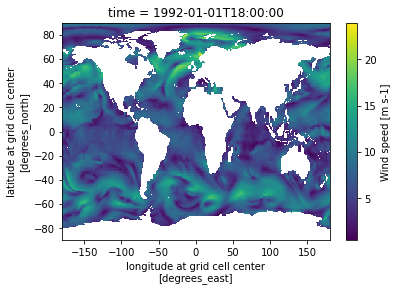

In [8]:
ds.EXFwspee.plot()

In [13]:
import s3fs
import os

os.environ["AWS_ACCESS_KEY_ID"] = creds["accessKeyId"]
os.environ["AWS_SECRET_ACCESS_KEY"] = creds["secretAccessKey"]
os.environ["AWS_SESSION_TOKEN"] = creds["sessionToken"]

s3 = s3fs.S3FileSystem(anon=False)

s3path = 's3://podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/202101*.nc'
#s3path = 's3://podaac-ops-cumulus-protected/ECCO_L4_ATM_STATE_05DEG_DAILY_V4R4/ATM_SURFACE_TEMP_HUM_WIND_PRES_day_mean_1992-01-*.nc'
remote_files = s3.glob(s3path)



In [14]:
remote_files

['podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20210101090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20210102090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20210103090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20210104090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20210105090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20210106090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20210107090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20210108090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20210109090000-JPL-L4_GHRSST

In [22]:
fileset = [s3.open(file) for file in remote_files]



In [23]:
# This works
data = xr.open_mfdataset(fileset, combine='by_coords', engine='h5netcdf' )


In [24]:
data

<xarray.Dataset>
Dimensions:           (time: 31, lat: 17999, lon: 36000)
Coordinates:
  * time              (time) datetime64[ns] 2021-01-01T09:00:00 ... 2021-01-3...
  * lat               (lat) float32 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon               (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    sst_anomaly       (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.7
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

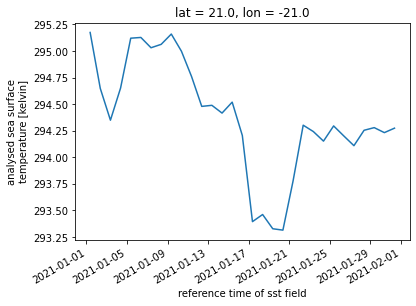

In [27]:
data.analysed_sst.sel(lat=21.00, lon=-21.00).plot()